In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading entire dataset
dataset = pd.read_csv('dataset.csv')


In [5]:
dataset.head()

,Affluence,Capacite,Journee,Jours,Date,Heure,Domicile,Resultat,exterieur,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final
0,24551,50000,1,sam,21/07/1989,20:30,Olympique de lyonnais,1-4,Olympique de Marseille,1,42.1,18,1,8,1
1,15572,50000,2,ven,29/07/1989,20:30,Olympique de lyonnais,3-0,Toulouse FC,0,42.1,7,8,8,9
2,15753,50000,4,ven,05/08/1989,20:30,Olympique de lyonnais,2-0,OGC Nice,0,42.1,8,13,8,18
3,23791,50000,6,ven,19/08/1989,20:30,Olympique de lyonnais,0-4,FC Sochaux-Montbeliard,0,42.1,9,4,8,4
4,17423,50000,8,mer,30/08/1989,20:30,Olympique de lyonnais,1-1,Racing Paris 1,0,42.1,13,14,8,19


In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import r2_score
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
import time

le = LabelEncoder()

dataset['Jours_label'] = le.fit_transform(dataset.Jours)
dataset['exterieur_label'] = le.fit_transform(dataset.exterieur)
dataset['Domicile_label'] = le.fit_transform(dataset.Domicile)
dataset['Capacite_label'] = le.fit_transform(dataset.Capacite)
dataset['Heure_label'] = le.fit_transform(dataset.Heure)

In [7]:
dataset.head()

,Affluence,Capacite,Journee,Jours,Date,Heure,Domicile,Resultat,exterieur,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final,Jours_label,exterieur_label,Domicile_label,Capacite_label,Heure_label
0,24551,50000,1,sam,21/07/1989,20:30,Olympique de lyonnais,1-4,Olympique de Marseille,1,42.1,18,1,8,1,4,36,0,6,15
1,15572,50000,2,ven,29/07/1989,20:30,Olympique de lyonnais,3-0,Toulouse FC,0,42.1,7,8,8,9,5,49,0,6,15
2,15753,50000,4,ven,05/08/1989,20:30,Olympique de lyonnais,2-0,OGC Nice,0,42.1,8,13,8,18,5,35,0,6,15
3,23791,50000,6,ven,19/08/1989,20:30,Olympique de lyonnais,0-4,FC Sochaux-Montbeliard,0,42.1,9,4,8,4,5,25,0,6,15
4,17423,50000,8,mer,30/08/1989,20:30,Olympique de lyonnais,1-1,Racing Paris 1,0,42.1,13,14,8,19,3,41,0,6,15


In [8]:
X = dataset.drop(['Jours', 'exterieur', 'Capacite', 'Affluence','Date','Heure','Domicile','Resultat'], axis = 1)
y = dataset.Affluence

In [9]:
X[:10]

,Journee,Derby,Victoire_dom,Dom_plac_joun,ext_plac_joun,Dom_plac_final,ext_plac_final,Jours_label,exterieur_label,Domicile_label,Capacite_label,Heure_label
0,1,1,42.1,18,1,8,1,4,36,0,6,15
1,2,0,42.1,7,8,8,9,5,49,0,6,15
2,4,0,42.1,8,13,8,18,5,35,0,6,15
3,6,0,42.1,9,4,8,4,5,25,0,6,15
4,8,0,42.1,13,14,8,19,3,41,0,6,15
5,10,0,42.1,14,18,8,17,5,32,0,6,15
6,12,0,42.1,6,16,8,16,5,45,0,6,15
7,14,0,42.1,13,7,8,3,4,4,0,6,15
8,16,0,42.1,9,2,8,2,5,27,0,6,15
9,18,0,42.1,7,17,8,20,3,22,0,6,15


In [9]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 86)

In [11]:
def evaluate(model):        
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    model_score = r2_score(y_test, pred)
    
    s = cross_val_score(model, X, y, cv=5, scoring='r2', n_jobs=-1)
        
    print ("R^2 score:", model_score)
    print ("Cross Validation Score: {:0.5} ± {:0.5}".format(s.mean().round(5), s.std().round(5)))
    
#     df = pd.DataFrame(columns=['attendance', 'predictions', 'residuals'])
#     df.attendance = y
#     df.predictions = model.predict(X)
#     df.residuals = df.attendance - df.predictions
#     df.plot(x='predictions', y='residuals', kind='scatter')
#     plt.show()

In [12]:
def feat_imp(model):
    feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns, columns=['importance']
                                      ).sort_values('importance', ascending=False)
    print (feature_importances)

In [13]:
rf = RandomForestRegressor(n_estimators=300)

In [14]:
%time evaluate(rf)

R^2 score: 0.8200307408575493
Cross Validation Score: -0.43641 ± 1.1037
Wall time: 4.8 s


In [15]:
feat_imp(rf)

                 importance
Dom_plac_final     0.532816
Capacite_label     0.179426
Journee            0.054729
Derby              0.050398
ext_plac_joun      0.047437
ext_plac_final     0.033254
exterieur_label    0.031983
Dom_plac_joun      0.028984
Victoire_dom       0.016082
Heure_label        0.012890
Jours_label        0.012001
Domicile_label     0.000000


In [16]:
def rf_gs():
    params = {
        'max_features' : [0.5, 0.75, 'auto', 'sqrt'],
        'max_depth' : [20, 30, None],
    }

    gs_rf = GridSearchCV(rf, params, n_jobs=-1, cv=5)
    gs_rf.fit(X_train, y_train)

    print (gs_rf.best_params_)

In [17]:
%time rf_gs()

{'max_depth': 30, 'max_features': 0.75}
Wall time: 15.1 s


In [18]:
rf_best_params = RandomForestRegressor(n_estimators=300, max_features=0.5, max_depth=None)

In [19]:
%time evaluate(rf_best_params)

R^2 score: 0.8000077391403692
Cross Validation Score: -0.32913 ± 0.84168
Wall time: 4.09 s


In [20]:
feat_imp(rf_best_params)

                 importance
Dom_plac_final     0.344859
Capacite_label     0.204127
Dom_plac_joun      0.140536
Journee            0.059750
ext_plac_joun      0.049383
Victoire_dom       0.044732
ext_plac_final     0.042868
Derby              0.036951
exterieur_label    0.032598
Heure_label        0.028431
Jours_label        0.015765
Domicile_label     0.000000


In [21]:
#Linear regression

In [22]:
X = dataset.drop(['Jours', 'exterieur', 'Capacite', 'Affluence','Date','Heure','Domicile','Resultat'], axis = 1)
y = dataset.Affluence

In [23]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [24]:
X = add_constant(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 86)

In [26]:
lin_model = OLS(y_train, X_train).fit()

In [27]:
lin_pred = lin_model.predict(X_test)
lin_model_score = r2_score(y_test, lin_pred)

print ("R^2 score:", lin_model_score)

R^2 score: 0.5935391273158919


In [76]:
lin_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Affluence   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     41.15
Date:                Sun, 15 Jul 2018   Prob (F-statistic):           2.33e-57
Time:                        00:59:36   Log-Likelihood:                -3852.4
No. Observations:                 378   AIC:                             7729.
Df Residuals:                     366   BIC:                             7776.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.288e+04   3615.940     14.625      0.000    4.58e+04       6e+04
Journee            37.4227     32.661      1.146      0.253     -26.804     101.649
Derby            5978.6517   1116.711      5.354      0.000    3782.676    8174.628
Victoire_dom     -168.2802     48.711     -3.455      0.001    -264.069     -72.491
Dom_plac_joun    -300.9303    142.082     -2.118      0.035    -580.331     -21.530
ext_plac_joun     -56.2589     96.067     -0.586      0.558    -245.171     132.654
Dom_plac_final  -1880.1348    208.773     -9.006      0.000   -2290.680   -1469.590
ext_plac_final   -128.8728     94.547     -1.363      0.174    -314.797      57.052
Jours_label      -187.5698    173.150     -1.083      0.279    -528.063     152.923
exterieur_label   -44.9820     22.865     -1.967      0.050     -89.945      -0.019
Domicile_label   7.444e-14   9.42e-15      7.901      0.000    5.59e-14     9.3e-14
Capacite_label    123.5893    188.530      0.656      0.513    -247.149     494.328
Heure_label         4.6340     75.383      0.061      0.951    -143.605     152.873
==============================================================================
Omnibus:                       12.495   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               21.881
Skew:                           0.175   Prob(JB):                     1.77e-05
Kurtosis:                       4.126   Cond. No.                     2.07e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.68e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#Gradient Boosting

In [77]:
X = dataset.drop(['Jours', 'exterieur', 'Capacite', 'Affluence','Date','Heure','Domicile','Resultat'], axis = 1)
y = dataset.Affluence

In [81]:
ss = StandardScaler()
Xscaled = ss.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 86)

In [83]:
gbr = GradientBoostingRegressor()

R^2 score: 0.8305244738410463
Cross Validation Score: -0.37365 ± 1.0283


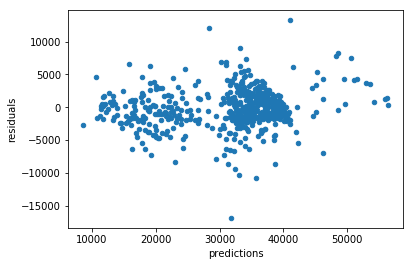

Wall time: 3.91 s


In [84]:
%time evaluate(gbr)

In [87]:
def gbr_gs():
    params = {
        'max_features' : [0.5, 0.75, 'auto', 'sqrt'],
        'max_depth' : [3, 5, 8, 15],
    }

    gs_gbr = GridSearchCV(gbr, params, n_jobs=-1, cv=5)
    gs_gbr.fit(X_train, y_train)

    print (gs_gbr.best_params_)

In [88]:
%time gbr_gs()

{'max_depth': 3, 'max_features': 0.5}
Wall time: 5.6 s


In [89]:
gbr_best_params = GradientBoostingRegressor(max_features='auto', max_depth=8)

R^2 score: 0.8388958385910048
Cross Validation Score: -0.57768 ± 1.3723


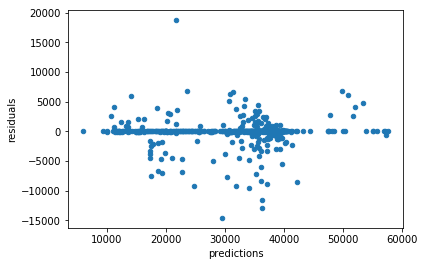

Wall time: 3.57 s


In [90]:
%time evaluate(gbr_best_params)

In [ ]:
# adjust parameters

In [91]:
gbr_best_params = GradientBoostingRegressor(n_estimators=500, max_features='auto', max_depth=10)

R^2 score: 0.8261417883132213
Cross Validation Score: -0.7084 ± 1.3142


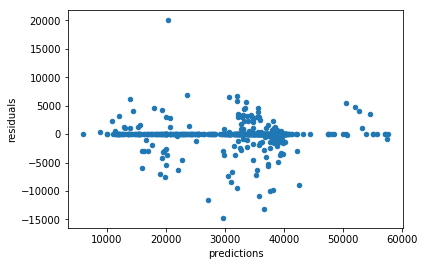

Wall time: 4.41 s


In [92]:
%time evaluate(gbr_best_params)

In [93]:
feat_imp(gbr_best_params)

                 importance
Journee            0.086986
Dom_plac_final     0.069303
exterieur_label    0.064669
ext_plac_joun      0.059263
ext_plac_final     0.052038
Victoire_dom       0.037069
Dom_plac_joun      0.036093
Capacite_label     0.035749
Heure_label        0.032840
Jours_label        0.019096
Derby              0.008892
Domicile_label     0.000000
